# Personal Loan Acceptance Predictions

By using the data from the bank's previous marketing campaign, we will use machine learning to predict whether a customer will accept a personal loan offer or not.

in this project, we will use the following models:
- Logistic Regression
- Random Forest
- Gradient Boosting
- Support Vector Machine
- K-Nearest Neighbors

after running all these models, we will create a voting classifier to see if we can get a better score.



In [3]:
# read dataset ...
import os
import pandas as pd
df = pd.read_csv(f'{os.getcwd()}/../data/UniversalBank.csv')

## Data splitting

We will split the data into training and testing sets. The training set will be used to train the models, and the testing set will be used to test the models.

In [4]:
df.drop(columns=['ID', 'ZIP Code'], inplace=True)

we don't need to use `ID` & `ZIP Code` columns, so that's why i did drop them.

in our case, we will use 80% of the data for training and 20% for testing.

In [5]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [7]:
# split dataset into train and test 
from sklearn.model_selection import train_test_split

X = df.drop(columns=['PersonalLoan'], axis=1) # features
y = df['PersonalLoan'] # target variable

(
    X_train, X_test,
    y_train, y_test
) = train_test_split(X, y, test_size=0.2, random_state=42)
# random_state=42 is used to get the same split every time 

In [8]:
# print the shape of train and test data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')  

X_train shape: (4000, 11)
X_test shape: (1000, 11)
y_train shape: (4000,)
y_test shape: (1000,)


## Model Training

We will train the models using the training data. We will use the following models:

- Logistic Regression
- Random Forest
- Gradient Boosting
- Support Vector Machine
- K-Nearest Neighbors



In [29]:
# import the necessary packages ...
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize the models
logistic_reg = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
svm = SVC(probability=True)
knn = KNeighborsClassifier()

after initializing the models, we will train them using the training data.

In [30]:
# train the models ...
logistic_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Model Evaluation

We will evaluate the models using the testing data. We will use the following metrics:

- Accuracy
- Precision
- Recall
- F1 Score
- ROC AUC Score


In [31]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1score, roc_auc

In [37]:
results = []

# Evaluate each model and store the results
models = [
    ('Logistic Regression', logistic_reg),
    ('Random Forest', random_forest),
    ('Gradient Boosting', gradient_boosting),
    ('SVM', svm),
    ('KNN', knn),
]

for model_name, model in models:
    accuracy, precision, recall, f1score, roc_auc = evaluate_model(model, X_test, y_test)
    results.append({
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1score': f1score,
        'roc_auc': roc_auc
    })

# convert the results into a dataframe
results_df = pd.DataFrame(results)

# create pivot tables for better visualization
results_df.set_index('model', inplace=True)

print(results_df)

                     accuracy  precision    recall   f1score   roc_auc
model                                                                 
Logistic Regression     0.952   0.851852  0.657143  0.741935  0.821868
Random Forest           0.989   0.979592  0.914286  0.945813  0.956026
Gradient Boosting       0.992   0.989899  0.933333  0.960784  0.966108
SVM                     0.900   0.727273  0.076190  0.137931  0.536419
KNN                     0.910   0.631579  0.342857  0.444444  0.659697


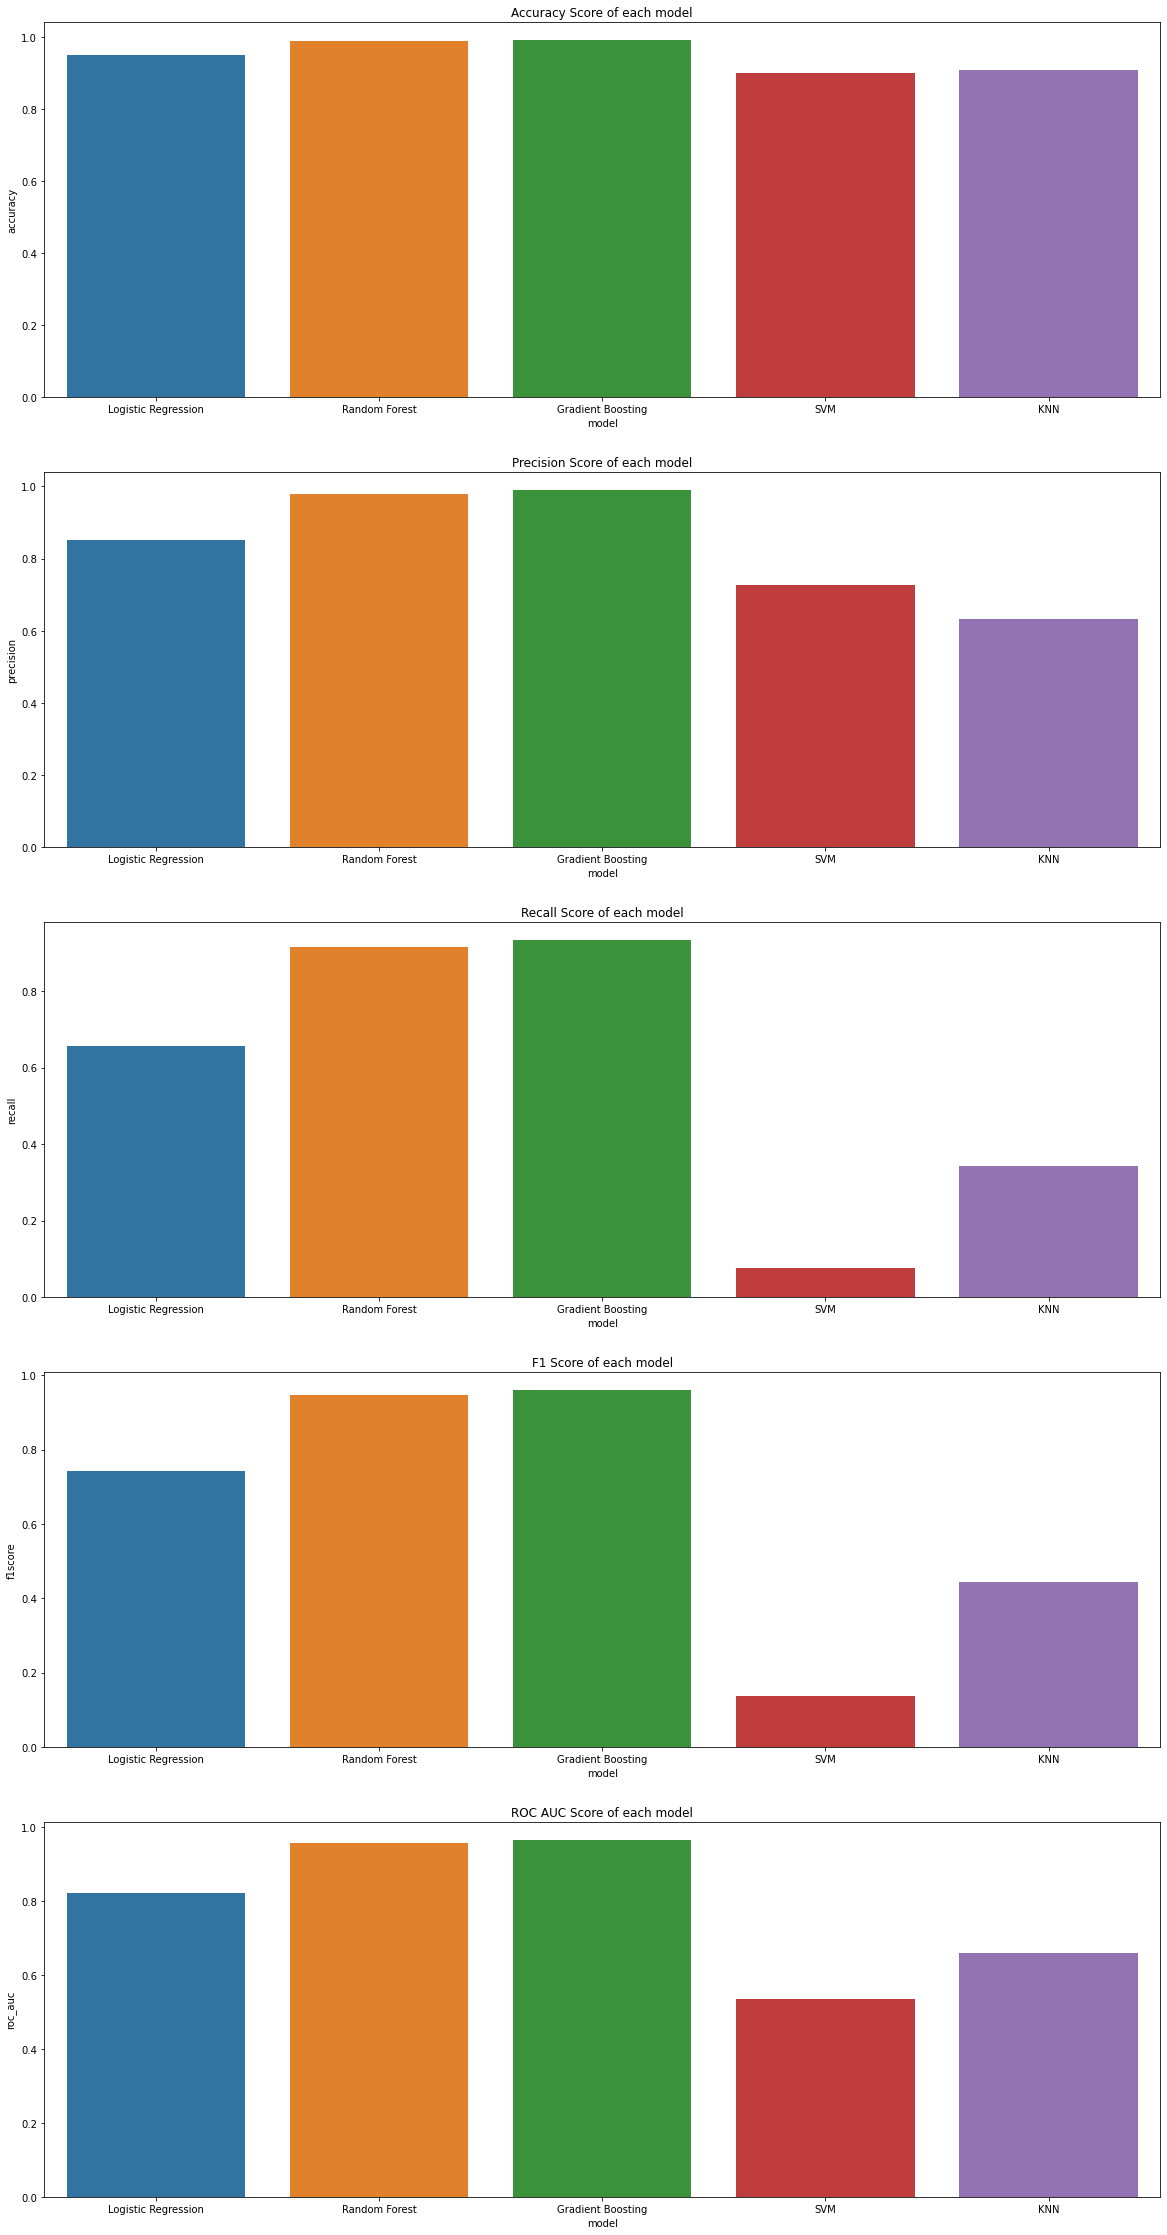

In [44]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(5, 1, figsize=(20, 40))
sns.barplot(x=results_df.index, y='accuracy', data=results_df, ax=ax[0])
sns.barplot(x=results_df.index, y='precision', data=results_df, ax=ax[1])
sns.barplot(x=results_df.index, y='recall', data=results_df, ax=ax[2])
sns.barplot(x=results_df.index, y='f1score', data=results_df, ax=ax[3])
sns.barplot(x=results_df.index, y='roc_auc', data=results_df, ax=ax[4])

# set the title of each plot
ax[0].set_title('Accuracy Score of each model')
ax[1].set_title('Precision Score of each model')
ax[2].set_title('Recall Score of each model')
ax[3].set_title('F1 Score of each model')
ax[4].set_title('ROC AUC Score of each model')
 

plt.show()


before we start voting classifier we notice that :

1. `Random Forest and Gradient Boosting`: These two models stand out with exceptionally high accuracy, precision, and F1-score. They excel at correctly classifying customers who accept personal loan offers while maintaining a high overall accuracy.

2. `Logistic Regression`: It achieves a good balance between precision and recall, making it a reliable choice for classification tasks. Although it has a slightly lower recall, it provides a solid overall performance.

3. `K-Nearest Neighbors (KNN)`: KNN shows reasonable accuracy but has lower precision and recall compared to Random Forest and Gradient Boosting. Further optimization might improve its performance.

4. `Support Vector Machine (SVM)`: SVM exhibits a high accuracy but poor recall, which means it may struggle to identify customers who accept personal loan offers. It may require feature engineering or hyperparameter tuning.

In summary, Random Forest and Gradient Boosting are the top-performing models, providing strong predictive accuracy and reliability for identifying customers likely to accept personal loan offers. These models are promising candidates for inclusion in the ensemble voting classifier.


In [46]:
# test the model on a single data point
import numpy as np

# select a random data point
random_index = np.random.randint(0, len(df))
data_point = df.iloc[random_index]

# test Random Forest Classifier
print(f'Actual Label: {data_point.PersonalLoan}')
# drop the target variable
data_point.drop('PersonalLoan', inplace=True)
# predict the label
prediction = random_forest.predict([data_point])
print(f'Predicted Label: {prediction[0]}')

Actual Label: 0.0
Predicted Label: 0
